In [22]:
#Analise de dados de celulares roubados registrados 
#pelo departamento da DEINTER de São José dos Campos 
#de Janeiro de 2018 à Abril de 2019.
#Utilizando as informações cedidas pelo portal de transparencia do governo do estado de São Paulo 
#é possivel evidenciar as regiões com maiores indices de roubo de celulares 
#e assim aplicar uma solução de segurança. 
#Projeto elaborado para a materia de Graduação de Projeto de Banco de Dados Não Estruturados na FATEC de São José dos Campos.

import pandas as pd
from pandas import Series, DataFrame
import folium
from folium import plugins
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [23]:
path = 'datasets/'
filenames = {'2018_1', '2018_2', '2018_3', '2018_4', '2018_5', '2018_6', '2018_7', '2018_8', '2018_9', '2018_10', '2018_11', '2018_12', '2019_1', '2019_2', '2019_3', '2019_4'}
extension = '.xls'

In [24]:
#Função para percorrer os arquivos de dados e popular o dataframe.
def populaDataFrame():
    dfList = list()

    for file in filenames:
        df= pd.DataFrame(pd.read_csv((path+file+extension), sep='\t', encoding='UTF-16 LE'))
        dfList.append(df)

    df = pd.concat(dfList)
    return df

In [25]:
df = populaDataFrame()
df.reset_index()
df.shape
#Quantidade de linhas e colunas no dataframe.

(11638, 54)

In [26]:
df.sample(10)
#10 linhhas aleatórias e seus dados.

ANO_BO   NUM_BO NUMERO_BOLETIM          BO_INICIADO           BO_EMITIDO  \
150    2019       74        74/2019  08/04/2019 09:57:37  08/04/2019 10:23:33   
645    2018   989797    989797/2018  30/07/2018 06:00:57  30/07/2018 06:00:57   
410    2018     3230      3230/2018  21/09/2018 01:14:51  21/09/2018 01:50:08   
425    2018      365       365/2018  19/04/2018 15:33:04  19/04/2018 16:02:41   
413    2018     4155      4155/2018  22/12/2018 04:39:16  22/12/2018 11:05:25   
252    2019      301       301/2019  14/02/2019 10:51:50  14/02/2019 13:26:09   
389    2018     2736      2736/2018  19/11/2018 10:15:33  19/11/2018 10:43:01   
274    2018  1032031   1032031/2018  08/08/2018 18:21:23  08/08/2018 18:21:21   
105    2018      472       472/2018  04/04/2018 21:04:30  04/04/2018 22:09:58   
245    2019   200865    200865/2019  13/02/2019 20:50:01  13/02/2019 20:50:01   

    DATAOCORRENCIA PERIDOOCORRENCIA DATACOMUNICACAO       DATAELABORACAO  \
150     08/04/2019       PELA MANHÃ      08/04/2019  08/04/2019 09:57:37   
645     29/07/2018          A NOITE      30/07/2018  30/07/2018 06:00:57   
410     20/09/2018          A NOITE      21/09/2018  21/09/2018 01:14:51   
425     18/04/2018          A NOITE      19/04/2018  19/04/2018 15:33:04   
413     22/12/2018     DE MADRUGADA      22/12/2018  22/12/2018 04:39:16   
252     12/02/2019          A NOITE      14/02/2019  14/02/2019 10:51:50   
389     15/11/2018       PELA MANHÃ      19/11/2018  19/11/2018 10:15:33   
274     03/08/2018          A NOITE      08/08/2018  08/08/2018 18:21:23   
105     04/04/2018          A NOITE      04/04/2018  04/04/2018 21:04:30   
245     13/02/2019       PELA MANHÃ      13/02/2019  13/02/2019 20:50:01   

       BO_AUTORIA FLAGRANTE NUMERO_BOLETIM_PRINCIPAL  \
150  Desconhecida       Não                      NaN   
645  Desconhecida       Não                      NaN   
410  Desconhecida       Não                      NaN   
425  Desconhecida       Não                      NaN   
413     Conhecida       Sim                      NaN   
252     Conhecida       Sim        373/2019 - 130508   
389  Desconhecida       Não                      NaN   
274  Desconhecida       Não                      NaN   
105  Desconhecida       Não                      NaN   
245  Desconhecida       Não                      NaN   

                            LOGRADOURO  NUMERO  \
150                      RUA PAISSANDÚ     1.0   
645  RUA DONA GABRIELA DE BARROS LESSA     0.0   
410                         RUA GEMINI   232.0   
425             AVENIDA ÂNGELO MOLINAR   252.0   
413           RUA GOVERNADOR VALADARES   233.0   
252                      RUA AMSTERDAN   159.0   
389         RUA JOAQUIM SILVERIO FILHO   598.0   
274             RUA JOÃO JOSÉ DA SILVA    44.0   
105                RUA OLIVEIRA BORGES     0.0   
245           VIADUTO RAQUEL MARCONDES   184.0   

                              BAIRRO             CIDADE  UF  \
150                           CENTRO      GUARATINGUETA  SP   
645  JARDIM RESIDENCIAL DOUTOR LESSA    PINDAMONHANGABA  SP   
410                  JARDIM SATÉLITE  S.JOSE DOS CAMPOS  SP   
425                        VILA GENY             LORENA  SP   
413              JARDIM SANTO ONOFRE  S.JOSE DOS CAMPOS  SP   
252                 JARDIM AEROPORTO  S.JOSE DOS CAMPOS  SP   
389               JARDIM SANTA JULIA  S.JOSE DOS CAMPOS  SP   
274                JARDIM PETRÓPOLIS  S.JOSE DOS CAMPOS  SP   
105                       SANTA RITA      GUARATINGUETA  SP   
245                           CENTRO  S.JOSE DOS CAMPOS  SP   

              LATITUDE          LONGITUDE DESCRICAOLOCAL   EXAME  \
150  -22,8204167059999      -45,194190164    Via pública     NaN   
645                NaN                NaN    Via Pública     NaN   
410  -23,2222591717142  -45,8910177406666    Via pública     NaN   
425  -22,7308308849999      -45,112520317    Via pública     NaN   
413   -23,248680434493  -45,8300972361134    Via pública  IC-IML   
252  -

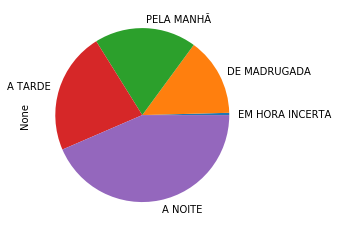

In [27]:
df.groupby('PERIDOOCORRENCIA').size().sort_values().plot(kind='pie')
#Gráfico de pizza com os períodos de ocorrência dos roubos de celulares.

In [28]:
df['PERIDOOCORRENCIA'].value_counts().to_frame()
#Dados quantitativos com os períodos de ocorrência dos roubos de celulares.

PERIDOOCORRENCIA
A NOITE                      5064
A TARDE                      2631
PELA MANHÃ                   2206
DE MADRUGADA                 1688
EM HORA INCERTA                49

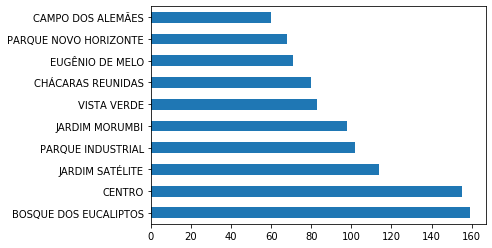

In [29]:
df.query('CIDADE == "S.JOSE DOS CAMPOS"')['BAIRRO'].value_counts().head(10).plot(kind='barh')
#Gráfico de barras horizontais contendo os bairros de SJC com mais ocorrência dos roubos de celulares.

In [30]:
df.query('CIDADE == "S.JOSE DOS CAMPOS"')['BAIRRO'].value_counts().to_frame().head(10)
#Dados quantitativos contendo os bairros de SJC com mais ocorrência dos roubos de celulares.

BAIRRO
BOSQUE DOS EUCALIPTOS     159
CENTRO                    155
JARDIM SATÉLITE           114
PARQUE INDUSTRIAL         102
JARDIM MORUMBI             98
VISTA VERDE                83
CHÁCARAS REUNIDAS          80
EUGÊNIO DE MELO            71
PARQUE NOVO HORIZONTE      68
CAMPO DOS ALEMÃES          60

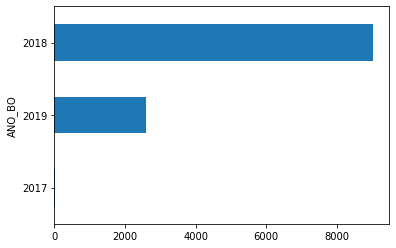

In [31]:
df.groupby('ANO_BO').size().sort_values().plot(kind='barh')
#Gráfico de barras horizontais contendo a quantidade de BO's por ano de SJC sos roubos de celulares.

In [32]:
df['ANO_BO'].value_counts().to_frame()
#Dados quantitativos contendo a quantidade de BO's por ano de SJC sos roubos de celulares.

ANO_BO
2018    9034
2019    2603
2017       1

In [33]:
df2019_4= pd.DataFrame(pd.read_csv((path+"2019_4"+extension), sep='\t', encoding='UTF-16 LE'))
df2019_4.shape
#Populando o dataframe com o arquivo de dados de 2019-4 e exibindo a quantidade de linhas e colunas.

(623, 54)

In [34]:
geolocalizacoes = df2019_4[['LATITUDE', 'LONGITUDE', 'PERIDOOCORRENCIA']].copy()
geolocalizacoes.isnull().sum()
#Copiando o dataframe com as informações que iremos utilizar e exibindo a quantidade de campos nulos.

LATITUDE            71
LONGITUDE           71
PERIDOOCORRENCIA     0
dtype: int64

In [35]:
geolocalizacoes.dropna(inplace=True)
geolocalizacoes.isnull().sum()
#Removendo os campos nulos e exibindo novamente a quantidade de campos nulos.

LATITUDE            0
LONGITUDE           0
PERIDOOCORRENCIA    0
dtype: int64

In [40]:
from IPython.display import HTML

coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

periodo = geolocalizacoes['PERIDOOCORRENCIA'].values

colors = {
 'DE MADRUGADA': 'blue',
 'PELA MANHÃ': 'green',
 'A TARDE': 'orange',
 'A NOITE': 'red',
 'EM HORA INCERTA': 'purple',
}

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=10)
cont = 0
for la,lo,p in zip(lat,long,periodo):
    folium.Marker(
        location=[float(la.replace(",", ".")), float(lo.replace(",", "."))],
        icon=folium.Icon(color=colors[p])
    ).add_to(mapa)

#mapa
#mapa._repr_html_()
#mapa.get_root().render()
display(HTML(mapa._repr_html_()))

#Através da biblioteca do Folium criamos um novo mapa, marcamos os roubos de celulares de abril 2019
#com as latitudes e longitudes do dataframe e definimos a cor do marcador através do período de ocorrência.

In [44]:
import os
import time
from selenium import webdriver

delay=5
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
mapa.save(fn)

browser = webdriver.Firefox()
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('map.png')
browser.quit()

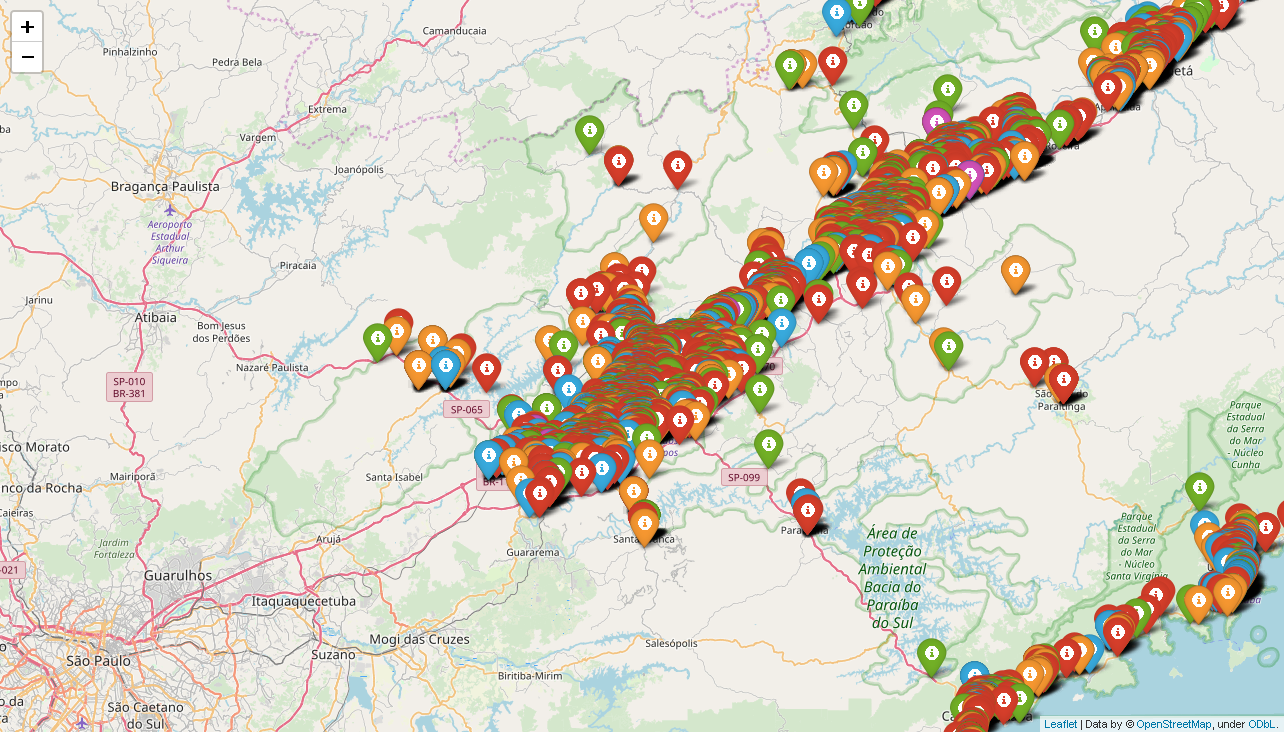

In [46]:
from IPython.display import Image
Image(filename="map.png")

In [37]:
geolocalizacoes = df[['LATITUDE', 'LONGITUDE', 'PERIDOOCORRENCIA']].copy()
geolocalizacoes.isnull().sum()
#Copiando o dataframe com as informações que iremos utilizar e exibindo a quantidade de campos nulos.

LATITUDE            1748
LONGITUDE           1748
PERIDOOCORRENCIA       0
dtype: int64

In [38]:
geolocalizacoes.dropna(inplace=True)
geolocalizacoes.isnull().sum()
#Removendo os campos nulos e exibindo novamente a quantidade de campos nulos.

LATITUDE            0
LONGITUDE           0
PERIDOOCORRENCIA    0
dtype: int64

In [39]:
coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=10)
 
for la,lo in zip(lat,long):
    coordenadas.append([float(la.replace(",", ".")),float(lo.replace(",", "."))])
    
mapa.add_child(plugins.HeatMap(coordenadas))
#Através da biblioteca do Folium criamos um novo mapa e populamos ele com as latitudes e longitudes do dataframe
#Utilizando um mapa de calor marcamos os pontos de roubos de celulares de janeiro de 2018 à  abril 2019